# Tutorial 2: My first matching

# Python libraries 

In [1]:
#########################################
# Python libraries                      #
#########################################
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
# For symbolic computation (solving algebra problems)
import sympy as sp

#########################################
# Cpymad library                        #
#########################################
from cpymad.madx import Madx 

#### Considering the periodic solution of the equation of motion of a FODO cell and imposing the **thin lens approximation** and the stability condition one can get the following relations between optics parameters and magnets properties:

$$\color{blue}{\text{Figure 1: Thin lens approximation FODO phase advance as a function of K, $L_{cell}$ and $L_q$}}$$ 

In [2]:
# Relation between the phase advance of the cell and K, Lcell, Lq 
a, b, g, m, d, Lq, Lc, K, pi = sp.symbols(r'\alpha,\beta, \gamma,\mu, \Delta, L_{q}, L_{cell} K \pi')
sp.Eq(d*m/pi,2/pi*sp.asin(K*Lq*Lc/4))

Eq(\Delta*\mu/\pi, 2*asin(K*L_{cell}*L_{q}/4)/\pi)

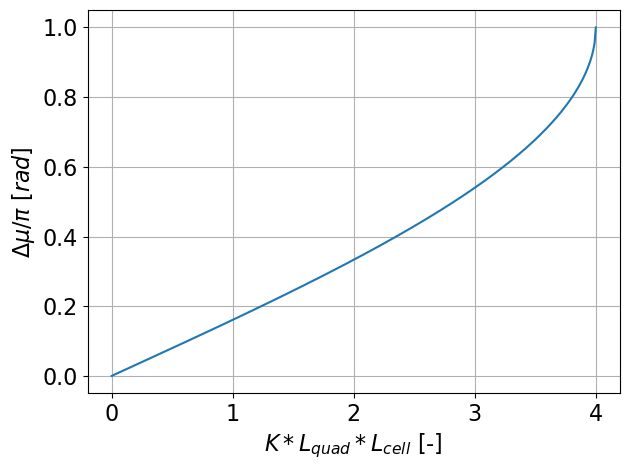

In [3]:
# Parametric plots
plt.rcParams['savefig.dpi'] = 100
plt.rcParams['figure.dpi'] = 100

x=np.arange(0,4.01,0.01)
y=2*np.arcsin(x/4)/np.pi
fig, ax1 = plt.subplots()
ax1.plot(x,y,'-')
ax1.set_ylabel("$\Delta \mu / \pi~[rad]$", fontsize=16)
ax1.set_xlabel("$K*L_{quad}*L_{cell}$ [-]", fontsize=16)
ax1.grid()
ax1.tick_params(axis='both', labelsize=16)
plt.tight_layout()  

$$\color{blue}{\text{Figure 2: Thin lens approximation maximum and minimum FODO $\beta$-function as a function of K, $L_{cell}$ and $L_q$}}$$

In [4]:
# Relation between the beta of the cell and K, Lcell, Lq
a, bmin, bmax, g, m, d, Lq, Lc, K, pi = sp.symbols(r'\alpha,\beta_{min}, \beta_{max}, \gamma,\mu, \Delta, L_{q}, L_{cell} K \pi')
sp.Eq(bmin/Lc,(1-(K*Lq*Lc/4))/(sp.sin(2*sp.asin(K*Lq*Lc/4))))

Eq(\beta_{min}/L_{cell}, (-K*L_{cell}*L_{q}/4 + 1)/sin(2*asin(K*L_{cell}*L_{q}/4)))

In [5]:
sp.Eq(bmax/Lc,(1+(K*Lq*Lc/4))/(sp.sin(2*sp.asin(K*Lq*Lc/4))))

Eq(\beta_{max}/L_{cell}, (K*L_{cell}*L_{q}/4 + 1)/sin(2*asin(K*L_{cell}*L_{q}/4)))

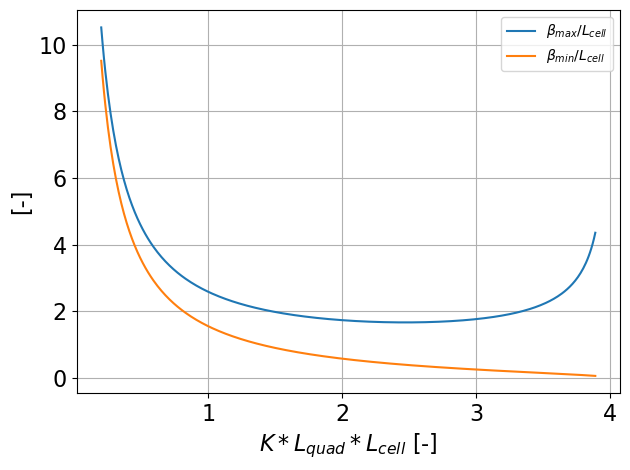

In [6]:
plt.rcParams['savefig.dpi'] = 100
plt.rcParams['figure.dpi'] = 100

x=np.arange(0.2,3.90,0.01)
betamax=(1+(x/4))/(np.sin(2*np.arcsin(x/4)))
betamin=(1-(x/4))/(np.sin(2*np.arcsin(x/4)))
fig, ax1 = plt.subplots()
ax1.plot(x,betamax,'-',label=r"$\beta_{max}/L_{cell}$")
ax1.plot(x,betamin,'-',label=r"$\beta_{min}/L_{cell}$")
ax1.set_ylabel("[-]", fontsize=16)
ax1.set_xlabel("$K*L_{quad}*L_{cell}$ [-]", fontsize=16)
plt.grid()
plt.legend()
plt.tick_params(axis='both', labelsize=16)
plt.tight_layout()  

# Launching MAD-X

In [7]:
# madx = Madx(stdout=True)
madx = Madx()


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.09.00  (64 bit, Darwin)      +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2023.05.05               +
  + Execution date: 2024.01.18 20:07:45      +
  ++++++++++++++++++++++++++++++++++++++++++++


# Questions

#### 1. Using the thin lens approximation solution from Fig. 3 (left) compute the required strength to power the quadrupoles to obtain a phase advance in the FODO cell of 90 degrees. Using the calculated K value, compute the linear optics functions using MAD-X. What is the phase advance computed by MAD-X?

#### From Figure 1, for 90 degrees phase advance the product ($k~*~L_{cell}~*~l_q$) is ~2.8

#### Therefore the strength needed for the quadrupoles is:

In [8]:
quadrupoleLenght=5
cellLength=100
myK=2.8/cellLength/quadrupoleLenght
print(myK)

0.005599999999999999


In [9]:
madx=Madx()
madx.call('Tutorial2_solution.madx');


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.09.00  (64 bit, Darwin)      +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2023.05.05               +
  + Execution date: 2024.01.18 20:07:45      +
  ++++++++++++++++++++++++++++++++++++++++++++
! *********************************************************************

! Definition of parameters

! *********************************************************************



l_cell=100;

quadrupolelength=5;

myk:=2.8/l_cell/quadrupolelength;



! *********************************************************************

! Definition of magnets

! ********************************************************************* 



qf: quadrupole, l=quadrupolelength, k1:=myk;

qd: quadrupole, l=quadrupolelength, k1:=-myk;





! *********************************************************************

! Definition of sequence

! *********************************************************************



myCell:sequence, refer=en

#### After loading the lattice we can define the beam, activate the sequence and run the MAD-X TWISS action to compute the optics from the pythonic environment uing the method `madx.input()`

In [10]:
myString='''
! *********************************************************************
! Definition of beam
! *********************************************************************
beam, particle=proton, energy=2;

! *********************************************************************
! Use of the sequence
! *********************************************************************
use, sequence=myCell;

! *********************************************************************
! TWISS
! *********************************************************************

twiss, file=MyfirstFODO.madx;'''

In [11]:
madx.input(myString)

enter Twiss module
  
iteration:   1 error:   0.000000E+00 deltap:   0.000000E+00
orbit:   0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00

++++++ table: summ

            length             orbit5               alfa            gammatr 
               100                 -0                  0                  0 

                q1                dq1            betxmax              dxmax 
      0.2363728498      -0.3307573246        160.6036546                  0 

             dxrms             xcomax             xcorms                 q2 
                 0                  0                  0       0.2363728498 

               dq2            betymax              dymax              dyrms 
     -0.3307573246        160.6036546                 -0                  0 

            ycomax             ycorms             deltap            synch_1 
                 0                  0                  0                  0 

           synch_2            

True

#### Then, we can access the MAD-X output data and put it into a pandas dataframe using the commands `madx.table.twiss.dframe()`

In [12]:
myDFTwiss=madx.table.twiss.dframe()
myDFTwiss[["name", "keyword","s","betx","bety","alfx","alfy", "mux", "muy" ]]

,name,keyword,s,betx,bety,alfx,alfy,mux,muy
#s,mycell$start:1,marker,0.0,160.603655,34.217492,-2.259847,0.548735,0.000000,0.000000
quadrupole1,quadrupole1:1,quadrupole,5.0,160.603655,34.217492,2.259847,-0.548735,0.004841,0.023892
drift_0[0],drift_0:0,drift,25.0,85.419675,71.376768,1.499352,-1.309229,0.032151,0.090204
marker1,marker1:1,marker,25.0,85.419675,71.376768,1.499352,-1.309229,0.032151,0.090204
drift_1[0],drift_1:0,drift,50.0,34.217492,160.603655,0.548735,-2.259847,0.108661,0.127712
quadrupole2,quadrupole2:1,quadrupole,55.0,34.217492,160.603655,-0.548735,2.259847,0.132553,0.132553
drift_2[0],drift_2:0,drift,75.0,71.376768,85.419675,-1.309229,1.499352,0.198864,0.159863
marker2,marker2:1,marker,75.0,71.376768,85.419675,-1.309229,1.499352,0.198864,0.159863
drift_3[0],drift_3:0,drift,100.0,160.603655,34.217492,-2.259847,0.548735,0.236373,0.236373
#e,mycell$end:1,marker,100.0,160.603655,34.217492,-2.259847,0.548735,0.236373,0.236373


#### Also with the SUMM table: `madx.table.summ.dframe()`

In [13]:
myDFSumm=madx.table.summ.dframe()
myDFSumm

,length,orbit5,alfa,gammatr,q1,dq1,betxmax,dxmax,dxrms,xcomax,...,synch_1,synch_2,synch_3,synch_4,synch_5,synch_6,synch_8,nflips,dqmin,dqmin_phase
#e,100.0,-0.0,0.0,0.0,0.236373,-0.330757,160.603655,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Phase advance computed by MAD-X in rad

In [14]:
myDFSumm["q1"]*2*np.pi

#e    1.485174
Name: q1, dtype: float64

#### Phase advance computed by MAD-X in degrees

In [15]:
myDFSumm["q1"]*2*np.pi*180/np.pi

#e    85.094226
Name: q1, dtype: float64

#### 2. And the $\beta_{max}$ value computed by MAD-X? Compare the obtained value with the thin lens approximation solution from Fig. 3 (right)

#### From the MAD-X calculation

In [16]:
myDFTwiss['betx'].max()

160.60365457633435

#### From the thin lens approximation
#### From Figure 1 --- ($k~*~L_{cell}~*~l_q$) is 

In [17]:
0.0056*100*5 

2.8

#### From Figure 2 for a value of ($k~*~L_{cell}~*~l_q$)=2.8 the beta_max

In [18]:
1.697*100

169.70000000000002

#### Now we can compute the relative variation

In [19]:
print('The relative variation in [%] between the thin and thick lens approximation for the maximum beta-function is:')
print(((169.70-160.60)/169.70)*100)

The relative variation in [%] between the thin and thick lens approximation for the maximum beta-function is:
5.362404242781376


#### 3. Reduce by half the focusing strength of the quadrupoles, what is the effect of it on the $\beta_{max}$, $\beta_{min}$ and $\Delta \mu$? Compare the obtained values with the thin lens approximation from Fig. 3

#### Instead of 2.8 now the value of the ($k~*~L_{cell}~*~l_q$)=1.4
#### We need to re-define the strenght of the quadrupoles

In [20]:
myString='''
cellLength=100;
quadrupoleLenght=5;
myK:=1.4/cellLength/quadrupoleLenght;// m^-2
twiss,file=firstTwiss.txt;
'''

In [21]:
madx.input(myString);

++++++ info: myk redefined
enter Twiss module
  
iteration:   1 error:   0.000000E+00 deltap:   0.000000E+00
orbit:   0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00

++++++ table: summ

            length             orbit5               alfa            gammatr 
               100                 -0                  0                  0 

                q1                dq1            betxmax              dxmax 
      0.1097922006      -0.1294924984        205.4604013                  0 

             dxrms             xcomax             xcorms                 q2 
                 0                  0                  0       0.1097922006 

               dq2            betymax              dymax              dyrms 
     -0.1294924984        205.4604013                  0                  0 

            ycomax             ycorms             deltap            synch_1 
                 0                  0                  0                  0 

   

#### Here we illustrate another way of printing the data using pure MAD-X commands

In [22]:
myString='''
value, table(SUMM,Q1);
value, table(SUMM,Q2);
value, table(SUMM,betxmax);
value, table(SUMM,betymax);
'''

In [23]:
madx.input(myString);

table( summ q1 )   =       0.1097922006 ;
table( summ q2 )   =       0.1097922006 ;
table( summ betxmax ) =        205.4604013 ;
table( summ betymax ) =        205.4604013 ;


#### Here the option using the pythonic approach

In [24]:
# Here the option using the pythonic approach
myDFTable_half=madx.table.twiss.dframe()


In [25]:
comparison=pd.DataFrame({'K1':myDFTwiss.max(),'Half K1':myDFTable_half.max()})
comparison.loc[['betx', 'alfx', 'mux','bety', 'alfy', 'muy']]

,K1,Half K1
betx,160.603655,205.460401
alfx,2.259847,1.434644
mux,0.236373,0.109792
bety,160.603655,205.460401
alfy,2.259847,1.434644
muy,0.236373,0.109792


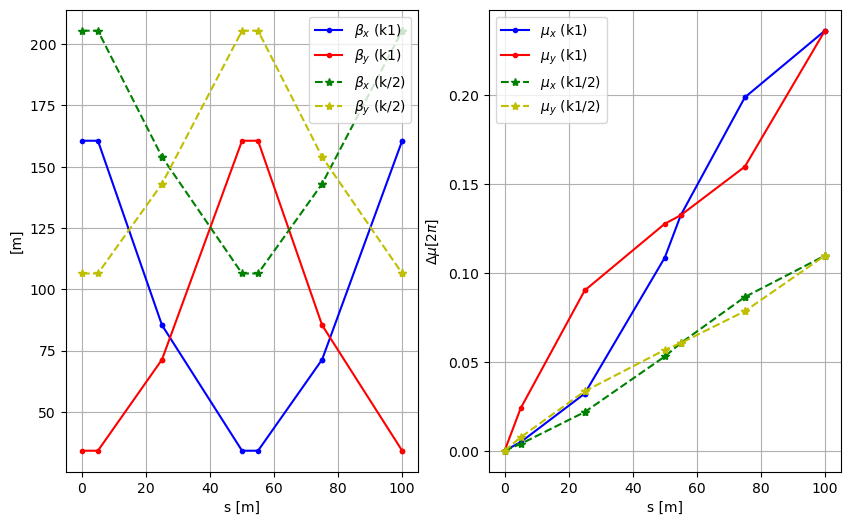

In [26]:
plt.rcParams['figure.dpi'] = 100

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,6))

ax1.plot(myDFTwiss['s'],myDFTwiss['betx'],'.-b',label=r'$\beta_x$ (k1)')
ax1.plot(myDFTwiss['s'],myDFTwiss['bety'],'.-r',label=r'$\beta_y$ (k1)')
ax1.plot(myDFTable_half['s'],myDFTable_half['betx'],'*--g',label=r'$\beta_x$ (k/2)')
ax1.plot(myDFTable_half['s'],myDFTable_half['bety'],'*--y',label=r'$\beta_y$ (k/2)')

ax1.set_xlabel('s [m]')
ax1.set_ylabel('[m]')
ax1.legend(loc='best')
ax1.grid()

ax2.plot(myDFTwiss['s'],myDFTwiss['mux'],'.-b',label=r'$\mu_x$ (k1)')
ax2.plot(myDFTwiss['s'],myDFTwiss['muy'],'.-r',label=r'$\mu_y$ (k1)')
ax2.plot(myDFTable_half['s'],myDFTable_half['mux'],'*--g',label=r'$\mu_x$ (k1/2)')
ax2.plot(myDFTable_half['s'],myDFTable_half['muy'],'*--y',label=r'$\mu_y$ (k1/2)')

ax2.set_xlabel('s [m]')
ax2.set_ylabel('$\Delta \mu [2\pi]$')
ax2.legend(loc='best')
ax2.grid()

#### **If we reduce the strength of the quadrupoles, k, the bmax, bmin increase resulting in a larger beam size. In the contrary, the phase advance is reduced. This is te effect on the optics when we focus less.**

#### In order to compare with the thin lens approximation, from Figure 2 and for ($k~*~L_{cell}~*~l_q$)=1.4, the $\beta_{max}$/$L_{cell}$= 2.042 and the $\beta_{max}$=

In [27]:
2.042*100

204.2

#### To be compared with the value from the MAD-X computation: 

In [28]:
bmax=np.max(myDFTable_half["betx"])
bmax

205.46040125139584

#### And the relative variation

In [29]:
((205.46040125139584-204.2)/205.46040125139584)*100

0.6134521512267733

#### **Better agreement is observed as we move to the left on the parametric plot (smaller K for fixed Lq and cell length values) as the thin lens approximation condition is better satisfied.**

#### 4. Compute the maximum beam size, $\sigma_{x,y}$ , assuming a normalized horizontal and vertical emittance, $\epsilon_n^{x,y}$, of 3 mrad mm and $E_{tot}$ = 7 TeV using the following relation:

$\begin{equation} \sigma_{x,y}=\sqrt{\frac{\beta_{x,y} \epsilon_n^{x,y}}{ \gamma_r}} \end{equation}$

In [30]:
emittance_n=3e-6 #m*rad
beta_gamma=7000/.938 # this is an approximation
np.sqrt(myDFTwiss['betx'].max()*emittance_n/beta_gamma)

0.00025409185177743577

In [31]:
# In mm
0.0002540918517774359*1e3

0.2540918517774359

In [32]:
emittance_n=3e-6 #m*rad
beta_gamma=7000/.938 # this is an approximation
np.sqrt(myDFTable_half['betx'].max()*emittance_n/beta_gamma)*1e3

0.28739359996886

# **EXTRA**

# Thin lens approximation (using MAD-X)

In [33]:
madx=Madx()
madx.call("Tutorial2_solution.madx")


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.09.00  (64 bit, Darwin)      +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2023.05.05               +
  + Execution date: 2024.01.18 20:07:46      +
  ++++++++++++++++++++++++++++++++++++++++++++
! *********************************************************************

! Definition of parameters

! *********************************************************************



l_cell=100;

quadrupolelength=5;

myk:=2.8/l_cell/quadrupolelength;



! *********************************************************************

! Definition of magnets

! ********************************************************************* 



qf: quadrupole, l=quadrupolelength, k1:=myk;

qd: quadrupole, l=quadrupolelength, k1:=-myk;





! *********************************************************************

! Definition of sequence

! *********************************************************************



myCell:sequence, refer=en

#### You need to have your lattice elements referred to the center

In [34]:
myString='''
myCell:sequence, refer=center, L=L_CELL;
quadrupole1: QF, at=2.5;
marker1: marker, at=25;
quadrupole2: QD, at=52.5;
marker2: marker, at=75;
endsequence;'''

madx.input(myString)

++++++ warning: implicit element re-definition ignored: quadrupole1
++++++ warning: implicit element re-definition ignored: marker1
++++++ warning: implicit element re-definition ignored: quadrupole2
++++++ warning: implicit element re-definition ignored: marker2


True

In [35]:
myString='''
! *********************************************************************
! Definition of beam
! *********************************************************************
beam, particle=proton, energy=2;

! *********************************************************************
! Use of the sequence
! *********************************************************************
use, sequence=myCell;

! *********************************************************************
! TWISS
! *********************************************************************

twiss, file=MyfirstFODO.madx;'''
madx.input(myString)

enter Twiss module
  
iteration:   1 error:   0.000000E+00 deltap:   0.000000E+00
orbit:   0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00

++++++ table: summ

            length             orbit5               alfa            gammatr 
               100                 -0                  0                  0 

                q1                dq1            betxmax              dxmax 
      0.2363728498      -0.3307573246        160.6036546                  0 

             dxrms             xcomax             xcorms                 q2 
                 0                  0                  0       0.2363728498 

               dq2            betymax              dymax              dyrms 
     -0.3307573246        160.6036546                 -0                  0 

            ycomax             ycorms             deltap            synch_1 
                 0                  0                  0                  0 

           synch_2            

True

In [36]:
myString='''
! TWISS before making the lattice thin
use,sequence=myCell; 
twiss,table=thick,centre,file=thick.txt;

! Makethin command
select, flag=makethin, class=quadrupole, slice=10; 
makethin,sequence=myCell; 

! TWISS after making the lattice thin
use,sequence=myCell;
twiss,table=thin,file=thin.txt;
'''
madx.input(myString)

enter Twiss module
  
iteration:   1 error:   0.000000E+00 deltap:   0.000000E+00
orbit:   0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00

++++++ table: summ

            length             orbit5               alfa            gammatr 
               100                 -0                  0                  0 

                q1                dq1            betxmax              dxmax 
      0.2363728498      -0.3307573246        166.3201191                  0 

             dxrms             xcomax             xcorms                 q2 
                 0                  0                  0       0.2363728498 

               dq2            betymax              dymax              dyrms 
     -0.3307573246        166.3201191                 -0                  0 

            ycomax             ycorms             deltap            synch_1 
                 0                  0                  0                  0 

           synch_2            

True

#### Checking the available output tables generated by MAD-X

In [37]:
print(list(madx.table))

['summ', 'twiss', 'thick', 'thin']


In [38]:
myDF_thick=madx.table.thick.dframe()

In [39]:
myDF_thin=madx.table.thin.dframe()

In [40]:
comparison=pd.DataFrame({'Thin':myDF_thin.max(),'Thick':myDF_thick.max()})
comparison.loc[['betx', 'alfx', 'mux','bety', 'alfy', 'muy']]

,Thin,Thick
betx,166.260214,166.320119
alfx,2.268464,1.879599
mux,0.236371,0.236373
bety,166.260214,166.320119
alfy,2.268464,1.879599
muy,0.236371,0.236373


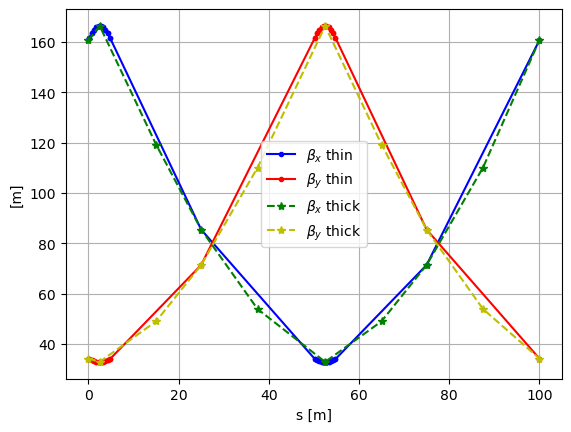

In [41]:
plt.rcParams['figure.dpi'] = 100

fig, ax1 = plt.subplots()

plt.plot(myDF_thin['s'],myDF_thin['betx'],'.-b',label='$\\beta_x$ thin')
plt.plot(myDF_thin['s'],myDF_thin['bety'],'.-r',label='$\\beta_y$ thin')
plt.plot(myDF_thick['s'],myDF_thick['betx'],'*--g',label='$\\beta_x$ thick')
plt.plot(myDF_thick['s'],myDF_thick['bety'],'*--y',label='$\\beta_y$ thick')

plt.xlabel('s [m]')
plt.ylabel('[m]')
plt.legend(loc='best')

plt.grid()